In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import nltk
nltk.download('vader_lexicon')
from nltk.sentiment.vader import SentimentIntensityAnalyzer

sid = SentimentIntensityAnalyzer()


[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\jrnai\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [2]:
thaiVilla = pd.read_excel('BlackTapReview.xlsx').drop(columns = ['Unnamed: 0'])
thaiVilla['Date'] = pd.to_datetime(thaiVilla['Date'])

In [3]:
thaiVilla

,Friends,Name,Rating,Review,UserReviews,Photos,Date
0,31,Christopher W.,4,I gave this lovely place a visit to try out th...,22,65,2021-08-22
1,304,yiannis p.,1,"I like the food, here, & the cashier was very ...",52,51,2021-09-29
2,14,Ray K.,3,Experienced Black Tap for the first time durin...,48,75,2021-07-30
3,306,Trendy D.,3,You can't make reservations so expect to wait ...,164,674,2021-07-11
4,16,Anel M.,4,I came here with my daughter just for the shak...,44,117,2021-07-17
...,...,...,...,...,...,...,...
1243,0,Stephen D.,1,what's the deal with the daunting lines at thi...,2,0,2016-09-14
1244,1,D Y.,2,Several friends and I got take out on Saturday...,22,0,2016-06-27
1245,181,Monica M.,1,I totally wish that I could rate lower than a ...,3,0,2016-08-18
1246,1,miranda v.,2,althought the burger was great....2 hours wait...,19,6,2016-04-14


In [4]:
thaiMenu = {'all american burger',
           'texan burger',
           'mexico city',
           'impossible all american',
           'greg norman',
           'mulberry street burger',
           'wagyu steakhouse burger',
           'smokehouse turkey burger',
           'black tap burger salad',
           'crispy chicken caesar salad',
           'korean bbq',
           'nashville hot',
           'crispy chicken sandwich',
           'pesto chicken sandwich',
           'idaho fries',
           'sweet potato fries',
           'queso',
           'chips',
           'guac',
           'brussels sprouts',
           'fried chicken tenders',
           'teriyaki broccoli',
           'fried mozz',
           'korean bbq cauliflower',
           'caesar salad',
           'house salad',
           'arugala salad',
           'cotton candy',
           'cakeshake',
           'cookies n cream supreme',
           'vegan black n white cakeshake',
           'bam bam shake',
           'cookie shake',
           'strawberry shortcake',
           'brooklyn blackout',
           'sweet n salty',
           'chocolate',
           'vanilla',
           'coffee',
           'black cherry',
           'strawberry',
           'nutella',
           'peanut butter',
           'oreo cookies & cream',
           'blueberry pie',
           'vegan key lime pie',
           'cake batter',
           'salted dulce de leche',
           'one brooklyn blackout & one cakeshake',
           'two cakeshakes',
           'brooklyn blackout',
           'brooklyn lager',
           'blone ale',
           'blue moon',
           'single cut plaintop silver',
           'imperial ipa',
           'downeast original cider',
           'chaser ipa',
           'barrier money',
           'zero gravity ale',
           'pilsner',
           'slighty mighty',
           'seaquench',
            'high life',
           'lager',
           'blonde ale',
           'rose cider',
           'wine',
           'lemonade',
           'margarita',
           'sangria',
           'black tap mule',
           'creamsicle',
           'saratoga still',
           'topo chico',
           'soda'}

# Distribution of the Friends Feature

In [5]:
friends = thaiVilla['Friends']

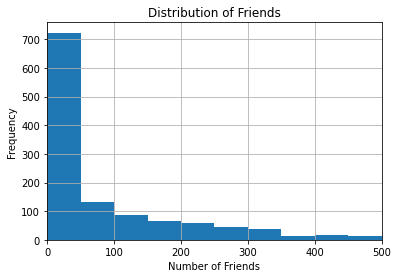

In [6]:
friends.hist(bins = 100)
plt.xlabel('Number of Friends')
plt.ylabel('Frequency')
plt.xlim(xmin=0, xmax = 500)
plt.title('Distribution of Friends')
#plt.figure(figsize=(20,20))
plt.show()

In [7]:
friends.describe()

count    1248.000000
mean      113.547276
std       231.381266
min         0.000000
25%         1.000000
50%        24.000000
75%       147.000000
max      5000.000000
Name: Friends, dtype: float64

# Distribution of the Ratings Feature

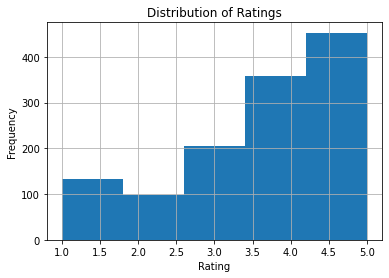

In [8]:
Ratings = thaiVilla['Rating']
Ratings.hist(bins = 5)
plt.xlabel('Rating')
plt.ylabel('Frequency')
#plt.xlim(xmin=0, xmax = 150)
plt.title('Distribution of Ratings')
#plt.figure(figsize=(20,20))
plt.show()

In [9]:
Ratings.describe()

count    1248.000000
mean        3.722756
std         1.311865
min         1.000000
25%         3.000000
50%         4.000000
75%         5.000000
max         5.000000
Name: Rating, dtype: float64

# Distribution of the UserReviews Feature

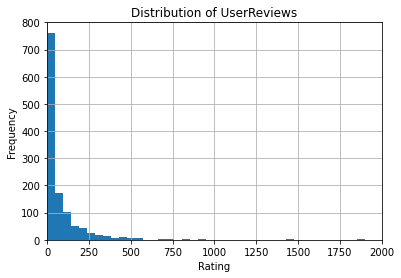

In [10]:
UserReviews = thaiVilla['UserReviews']
UserReviews.hist(bins = 50)
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.xlim(xmin=0, xmax = 2000)
plt.title('Distribution of UserReviews')
#plt.figure(figsize=(20,20))
plt.show()

In [11]:
UserReviews.describe()

count    1248.000000
mean      100.463942
std       235.688172
min         1.000000
25%         9.000000
50%        30.000000
75%        96.000000
max      2374.000000
Name: UserReviews, dtype: float64

# Distribution of the Photos Feature

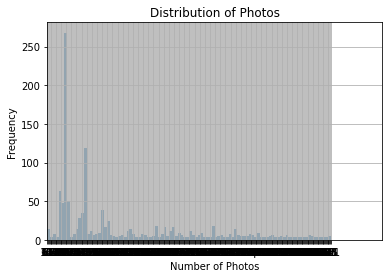

In [12]:
Photos = thaiVilla['Photos']
Photos.hist(bins = 100)
plt.xlabel('Number of Photos')
plt.ylabel('Frequency')
plt.xlim(xmin=0, xmax = 400)
plt.title('Distribution of Photos')
#plt.figure(figsize=(20,20))
plt.show()

In [13]:
thaiVilla['Photos'].describe()

count     1248
unique     340
top          0
freq       266
Name: Photos, dtype: object

# Time Series of Ratings vs Time

In [14]:
import datetime
import random
import matplotlib.pyplot as plt

In [15]:
sortedDf = thaiVilla.sort_values(['Date'], ascending=True)

In [16]:
sortedDf = pd.DataFrame(sortedDf.groupby("Date")["Rating"].mean())

In [17]:
x = sortedDf.index
y = sortedDf['Rating']

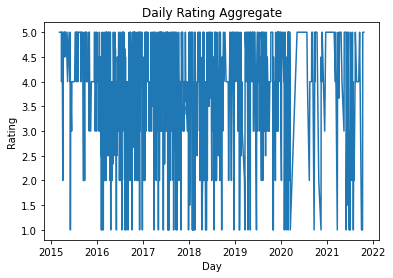

<Figure size 3600x1080 with 0 Axes>

In [18]:
plt.plot(x,y)
plt.title('Daily Rating Aggregate')
plt.ylabel('Rating')
plt.xlabel('Day')
plt.figure(figsize=(50,15))
plt.show()

In [19]:
sortedDf = thaiVilla.sort_values(['Date'], ascending=True)

In [20]:
monthlyRating = pd.DataFrame(sortedDf.groupby([sortedDf['Date'].dt.year.rename('year'), sortedDf['Date'].dt.month_name().rename('month')])['Rating'].mean().reset_index())

In [21]:
monthlyRating['my'] = monthlyRating['year'].astype(str) + ' ' + monthlyRating['month'].astype(str)

In [22]:
monthlyRating

,year,month,Rating,my
0,2015,April,4.642857,2015 April
1,2015,August,4.714286,2015 August
2,2015,December,4.111111,2015 December
3,2015,July,4.444444,2015 July
4,2015,June,3.500000,2015 June
...,...,...,...,...
74,2021,June,2.857143,2021 June
75,2021,March,3.800000,2021 March
76,2021,May,3.800000,2021 May
77,2021,October,3.666667,2021 October


In [23]:
x = monthlyRating['my']
y = monthlyRating['Rating']

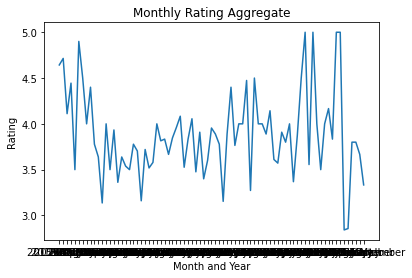

<Figure size 3600x1080 with 0 Axes>

In [24]:
plt.plot(x,y)
plt.title('Monthly Rating Aggregate')
plt.ylabel('Rating')
plt.xlabel('Month and Year')
plt.figure(figsize=(50,15))
plt.show()

# Food Occurences in Menu

In [25]:
lst = []
for i, row in thaiVilla.iterrows():
    count = 0
    s = row.Review.lower().replace(' ', '')
    for i in thaiMenu:
        i = i.lower()
        if i.replace(' ', '') in s:
            count += 1
    lst.append(count)
    
#     print(i, row)
#     count = 0
#     s = row.Review.lower()
#     s = s.plit()
#     seven = s[:7]
#     six = s[:6]
#     five = s[:5]
#     four = s[:4]
#     three = s[:3]
#     two = s[:2]
#     for j in s:
#         if j in thaiMenu:
#             count += 1
#     for j in s:
#         if seven in s or sixe.....:
#             count += 1
#         seven = seven[1:] + [j]
#         ...
#     lst.append(count)
#     break

In [26]:
thaiVilla['Food Occurs'] = lst

# Catching Sentiment in Reviews

In [27]:
positive = {'best', 'amazing', 'love', 'good', 'perfect', 'fantastic', 'beautiful', 'yummy', 'delicious'}
negative = {'horrible', 'bad', 'gross', 'hate', 'disgusting', 'dread', 'terrible'}

In [28]:
plst = []
nlst = []
for i, row in thaiVilla.iterrows():
    gcount = 0
    ncount = 0
    s = row.Review.lower().replace(' ', '')
    for i in positive:
        if i in s:
            gcount += 1
    for i in negative:
        if i in s:
            ncount += 1     
    plst.append(gcount)
    nlst.append(ncount)

In [29]:
thaiVilla['Positive Occurs'] = plst
thaiVilla['Negative Occurs'] = nlst

In [30]:
thaiVilla

,Friends,Name,Rating,Review,UserReviews,Photos,Date,Food Occurs,Positive Occurs,Negative Occurs
0,31,Christopher W.,4,I gave this lovely place a visit to try out th...,22,65,2021-08-22,2,1,0
1,304,yiannis p.,1,"I like the food, here, & the cashier was very ...",52,51,2021-09-29,0,0,0
2,14,Ray K.,3,Experienced Black Tap for the first time durin...,48,75,2021-07-30,0,2,1
3,306,Trendy D.,3,You can't make reservations so expect to wait ...,164,674,2021-07-11,0,1,2
4,16,Anel M.,4,I came here with my daughter just for the shak...,44,117,2021-07-17,0,0,0
...,...,...,...,...,...,...,...,...,...,...
1243,0,Stephen D.,1,what's the deal with the daunting lines at thi...,2,0,2016-09-14,0,0,0
1244,1,D Y.,2,Several friends and I got take out on Saturday...,22,0,2016-06-27,0,1,0
1245,181,Monica M.,1,I totally wish that I could rate lower than a ...,3,0,2016-08-18,0,1,0
1246,1,miranda v.,2,althought the burger was great....2 hours wait...,19,6,2016-04-14,0,0,0


# Correlation Heatmap

<AxesSubplot:>

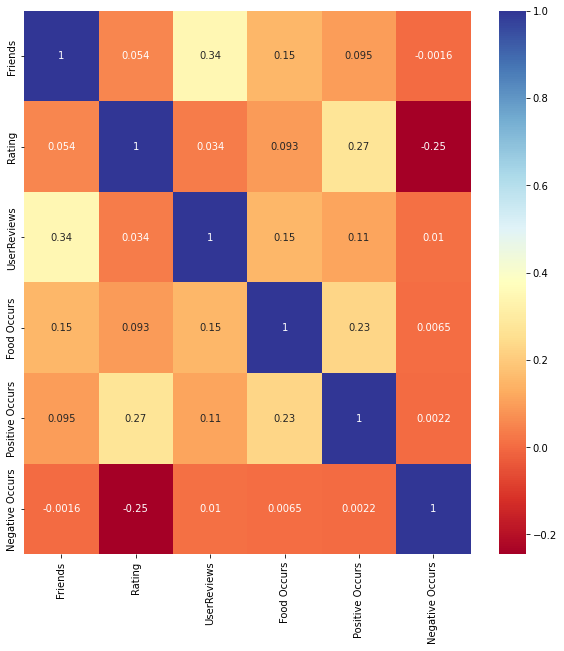

In [31]:
correlation = thaiVilla[['Friends', 'Rating', 'UserReviews', 'Photos', 'Food Occurs', 'Positive Occurs', 'Negative Occurs']]

corr = correlation.corr(method='kendall')
plt.figure(figsize=(10,10))
sns.heatmap(corr, annot=True, cmap="RdYlBu")

# Positive Sentiment Analysis

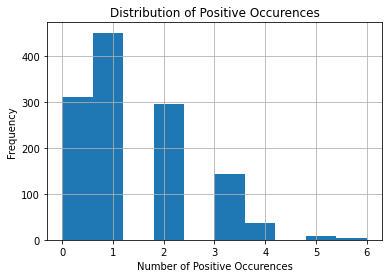

In [32]:
posOcc = thaiVilla['Positive Occurs']
posOcc.hist(bins = 10)
plt.xlabel('Number of Positive Occurences')
plt.ylabel('Frequency')
# plt.xlim(xmin=0, xmax = 400)
plt.title('Distribution of Positive Occurences')
#plt.figure(figsize=(20,20))
plt.show()

# Negative Sentiment Analysis

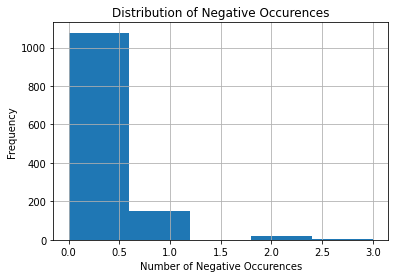

In [33]:
negOcc = thaiVilla['Negative Occurs']
negOcc.hist(bins = 5)
plt.xlabel('Number of Negative Occurences')
plt.ylabel('Frequency')
# plt.xlim(xmin=0, xmax = 400)
plt.title('Distribution of Negative Occurences')
#plt.figure(figsize=(20,20))
plt.show()

In [35]:
score_df = pd.DataFrame(columns = ['Menu Item', 'Positive', 'Negative', 'Neutral', 'Score'])

for item in thaiMenu:
    item = item.lower()
    pos = 0
    neg = 0
    neu = 0
    rating = 0
    for review in thaiVilla['Review']:
        review = review.lower()
        sentences_with_item = []
        sents = nltk.tokenize.sent_tokenize(review)
        for sent in sents:
           if sent.find(item) != -1:
                sentences_with_item.append(sent)
        for sent in sentences_with_item:
           # print(sent)
            score = sid.polarity_scores(sent)
            #print(score)
            rating += score['compound']
            if score['compound'] > 0:
                pos += 1
            elif score['compound'] < 0:
                neg += 1
            else:
                neu += 1
    total_mentions = pos + neg + neu
    if total_mentions > 10:
        #pct_pos = pos / total_mentions
        avg = rating / total_mentions

        score_df = score_df.append({'Menu Item' : item, 'Positive' : pos, 'Negative' : neg, 'Neutral' : neu, 'Score': avg},
                ignore_index = True)
score_df = score_df.sort_values(by=['Score'])
print('WORST')
for index, row in score_df.head(3).iterrows():
    print(row['Menu Item'] + ': ' + str(row['Score']))
print()
print('BEST')
for index, row in score_df.tail(3).iterrows():
    print(row['Menu Item'] + ': ' + str(row['Score']))
    # print(item)
    # print('pos: ' + str(pos))
    # print('neg ' + str(neg))
    # print()
score_df







WORST
cookie shake: 0.6
vanilla: 0.625
brooklyn blackout: 0.6666666666666666

BEST
texan burger: 0.9259259259259259
sweet potato fries: 0.9565217391304348
sweet n salty: 1.0


,Menu Item,Positive,Negative,Score
2,cookie shake,45,30,0.600000
4,vanilla,25,15,0.625000
8,brooklyn blackout,16,8,0.666667
15,chocolate,45,21,0.681818
12,chips,18,7,0.720000
1,cotton candy,45,16,0.737705
3,korean bbq,12,4,0.750000
0,peanut butter,26,8,0.764706
6,all american burger,11,3,0.785714
7,nutella,13,3,0.812500
